#Radiometer Experiment 5 - Performance vs bandwidth

Recall from Exp 1 where we looked at $NE\Delta T$ which lets us know what the sensitivity or performance of the radiometer will be.  Recall the following equation for $NE\Delta T$


(1)  $$NE\Delta T=\frac{T_{A}+T_{sys}}{\sqrt{\beta  \tau}}$$

Our sensitivity is based on the amount of noise we have from both the antenna or $T_{A}$ plus the addition of our system noise which is $T_{sys}$.  Finally our bandwidth of the signal, $\beta$ and our integration time, $\tau$, are the final factors that determine our $NE\Delta T$.

Our integration time is controllable, and can be set using the GUI panel for the software defined radio.  In a typical radiometer, we often do not have any control of the bandwidth.  It is often set by the mechanical bandwidth filters that are placed in front of the LNAs and the detection circuit to detect the noise power.  In a software defined radio radio we do have more control on bandwidth as we can change our sampling rate which in turns controls our bandwidth.  However, there is a limit as larger sampling rates require more data and processing bandwidth to process.  

In addtion, recall from Exp 4 where we filtered out an offending signal.  While this allows us to filter out the offending signal and resume total power measurements, it comes at a cost of reducing the overall bandwidth available for power detection.  In Experiment 4 we looked at this and derived the following equation

(2)  $$NE\Delta T=\frac{T_{A}+T_{sys}}{\sqrt{(\beta - \beta_{filter})  \tau}}$$

This equation now takes into account the substraction of the filter.  The width of the band reject filter used then affects our $NE\Delta T$ and thus our performace of the radiometer.  



Let's look at an example of this.  To begin with we will assume that our $T_{A}$ and $T_{sys}$ are fixed, let's assign them a value of 450 kelvin.  We will also set our integration time to a fixed value as well, in this case we will set it to 2 seconds.  We will start with a bandwdith of 10 MHz.  In Python we can assign these values now, we will also setup our environment.

In [1]:
%pylab inline
import scipy
import numpy
import scipy.io as sio

Populating the interactive namespace from numpy and matplotlib


In [2]:
tau = 2
BSDR = 10e6
Tsys = 350
TA = 273

Ok, let's calculate what our $NE\Delta T$ is with these values.

In [3]:
NEAT = (TA+Tsys)/sqrt((BSDR)*tau)
print NEAT

0.139307034998


Now let's add a filter.  This filter shall have a bandwidth of 500 kHz that it is notching out.  We will now use equation (2) and subtract this filter from our overall bandwidth since our band-reject filter is not only removing the offending signal but also any other noise power information with it.

In [4]:
BFILTER = 500e3
NEAT_FILTER = (TA+Tsys)/sqrt((BSDR-BFILTER)*tau)
print NEAT_FILTER

0.142926002201


As expected our $NE\Delta T$ has gone up.  This means that we are not able to detect as small of a change as we did before.  If we continue to increase the bandwidth of our band-reject filter we will see it continue to go up.

In [5]:
BFILTER = 1e6
NEAT_FILTER = (TA+Tsys)/sqrt((BSDR-BFILTER)*tau)
print NEAT_FILTER

0.146842508226


In [6]:
BFILTER = 9.9e6
NEAT_FILTER = (TA+Tsys)/sqrt((BSDR-BFILTER)*tau)
print NEAT_FILTER

1.39307034998


Let's graph this response.  We will have various filter bandwidths from 1 kHz all the way to 9.99 MHz.  If we set the bandwidth to 10 MHz, then we are taking the square root of zero which is zero and this creates a divide by zero.

We will also draw a line for our desired performance.  For this example let's say we want a sensitivity of .2 Kelvin or better on the radiometer.  If we remove too much bandwidth we will drop below this performance metric.

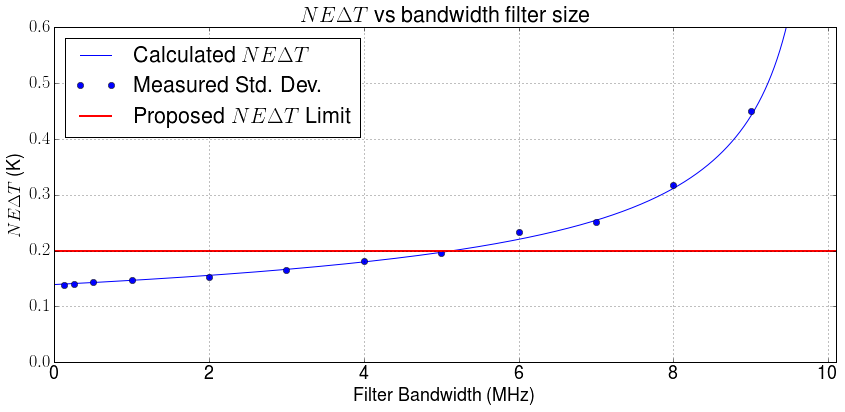

In [7]:
bfilt = numpy.linspace(1e3,9.999e6,10e3)
NEAT_FILTER = (TA+Tsys)/sqrt((BSDR-bfilt)*tau)
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#xfmt = plt.matplotlib.ticker.ScalarFormatter(useOffset=True)
#xfmt.set_powerlimits((-5,5))
fig = plt.figure(figsize=(14,6), dpi=300)
plot(bfilt,NEAT_FILTER,label='Calculated $NE\Delta T$')
plot([125e3,250e3,500e3,1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,10e6],[.139,.141,.143,.147,.153,.166,.181,.195,.234,.252,.318,.450,1.45],'bo',label='Measured Std. Dev.')
# draw vertical line from (70,100) to (70, 250)
plot([0, 10.5e6], [.2, .2], 'r-', lw=2,label='Proposed $NE\Delta T$ Limit')
xlabel('Filter Bandwidth (MHz)')
ylabel('$NE\Delta T$ (K)')
title('$NE\Delta T$ vs bandwidth filter size')
axis([0, 10.1e6, 0, .6])
plt.legend(loc='upper left')
def fmt_mhz(val,pos=None):
    return '%g' % (val / 1e6)
gca().xaxis.set_major_formatter(FuncFormatter(fmt_mhz))
#plt.ticklabel_format(style='sci', axis='x', useOffset=True, scilimits=(-5,5))
grid(True)
fig.savefig("neatvsbw_plot.pdf", dpi=300)
fig.savefig("neatvsbw_plot.png", dpi=300)

As expected this is an expotential increase.  We can also see that around 5 MHz the sensitivity exceeds the .2 Kelvin we said we wanted.  This means that if we cut out more than 5 MHz of signal with our filter, we will exceed our minimum sensitivity.

We now want to look at what really happens with a radiometer and more specifically with a software defined radio radiometer.  If we assume that our noise source is constant then we can look at the total power values.

Let's now take a look at measured power and the impact that the bandwidth has on the total power measured.  We will assume that we have a Gaussian noise source and that it is currently reading -40 dBm with a 10 MHz wide signal.  Actually our noise source ideally is across the entire spectrum, but for this excercise we will artifically limit it to 10 MHz as we would see in our SDR Radiometer.

[  2.50000000e-05   4.99974997e-05   7.49949995e-05 ...,   2.49925005e-01
   2.49950003e-01   2.49975000e-01]


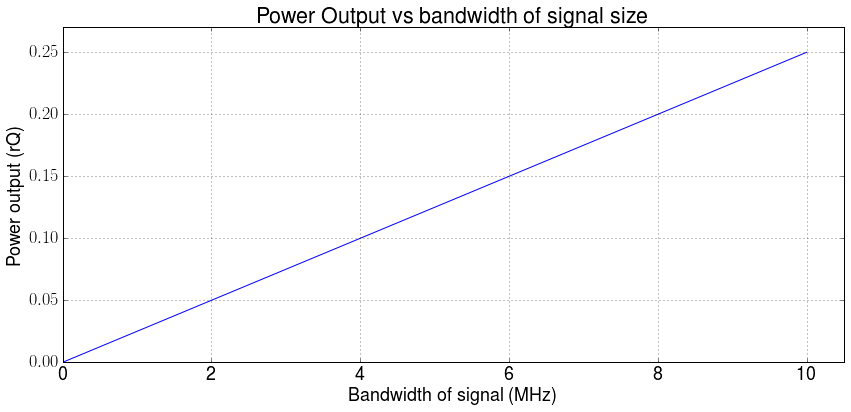

In [8]:
t_pwr = .25*(bfilt/10e6)
print t_pwr
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#xfmt = plt.matplotlib.ticker.ScalarFormatter(useOffset=True)
#xfmt.set_powerlimits((-5,5))
fig = plt.figure(figsize=(14,6), dpi=300)
plot(bfilt,t_pwr,label='Theortical')
xlabel('Bandwidth of signal (MHz)')
ylabel('Power output (rQ)')
title('Power Output vs bandwidth of signal size')
axis([0, 10.5e6, 0, .27])
def fmt_mhz(val,pos=None):
    return '%g' % (val / 1e6)
gca().xaxis.set_major_formatter(FuncFormatter(fmt_mhz))
#plt.ticklabel_format(style='sci', axis='x', useOffset=True, scilimits=(-5,5))
grid(True)

fig.savefig("pwrvsbw_plot.pdf", dpi=300)
fig.savefig("pwrvsbw_plot.png", dpi=300)

We can see above that we get an expected linear response and as the bandwidth goes down, so does the power.  We can know try an experiment where we reduce the bandwidth at set intervals and measure the total power.  Since our radiometer is setup for outputting this as rQ values, we will use those values, but our rQ value is basically our total power, just not calibrated to anything yet.  We could calibrate them to dBm or even noise temperature, but for this exercise it is not needed.

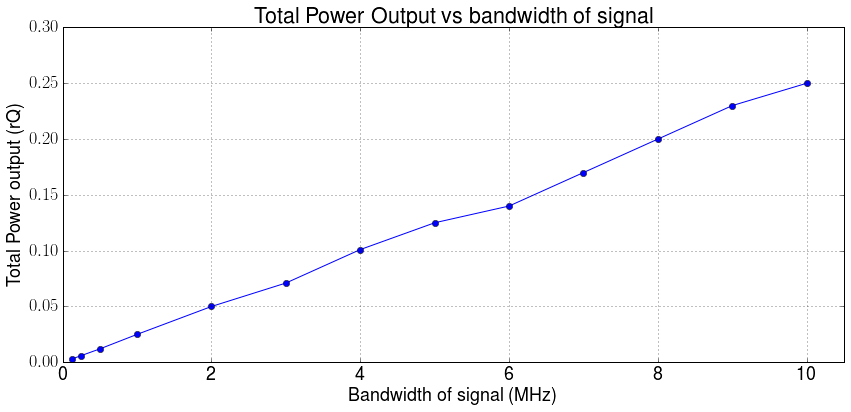

In [9]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
fig = plt.figure(figsize=(14,6), dpi=300)
plot([125e3,250e3,500e3,1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,10e6],[.003,.006,.012,.025,.050,.071,.101,.125,.140,.17,.20,.23,.25],'bo-')
xlabel('Bandwidth of signal (MHz)')
ylabel('Total Power output (rQ)')
title('Total Power Output vs bandwidth of signal')
axis([0, 10.5e6, 0, .3])
def fmt_mhz(val,pos=None):
    return '%g' % (val / 1e6)
gca().xaxis.set_major_formatter(FuncFormatter(fmt_mhz))

grid(True)
fig.savefig("rqvsbw_plot.pdf", dpi=300)
fig.savefig("rqvsbw_plot.png", dpi=300)

In the graph above we took measurements of the rQ value at set bandwidth settings.  Specifically 125 kHz, 250 kHz, 500 kHz, and 1-10 MHz at 1 MHz intervals.  The graph above shows that as expected as our bandwidth gets smaller, the amount of total power received decreses and this is again a linear response.  

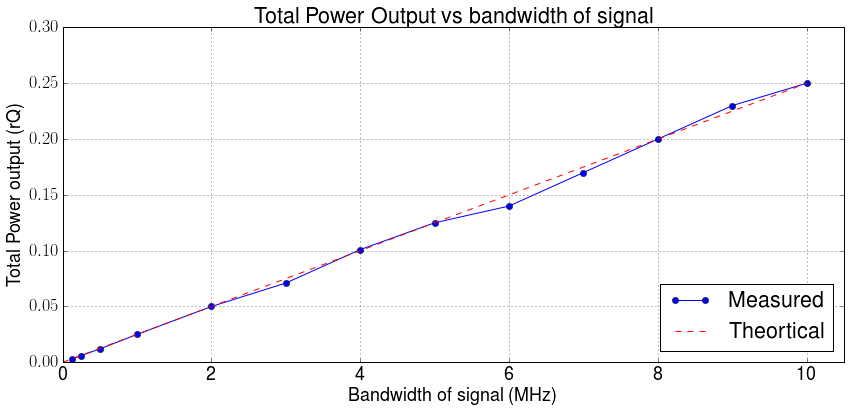

In [10]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
fig = plt.figure(figsize=(14,6), dpi=300)
plot([125e3,250e3,500e3,1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6,10e6],[.003,.006,.012,.025,.050,.071,.101,.125,.140,.17,.20,.23,.25],'-bo',label='Measured')
plot(bfilt,t_pwr,'r--',label='Theortical')
xlabel('Bandwidth of signal (MHz)')
ylabel('Total Power output (rQ)')
title('Total Power Output vs bandwidth of signal')
axis([0, 10.5e6, 0, .3])
def fmt_mhz(val,pos=None):
    return '%g' % (val / 1e6)
gca().xaxis.set_major_formatter(FuncFormatter(fmt_mhz))
plt.legend(loc='lower right')
grid(True)
fig.savefig("combined_plot.pdf", dpi=300)
fig.savefig("combined_plot.png", dpi=300)

In the real world we would want to know how this impacts our measurements.  It is clear that the total power decreases, but how does this affect our noise brightness measurements?  Let's look at what generates our total power and to do that we can look at this equation.

(3) $$P_{out} = kBG(T_{a}+T_{N})$$

Here $k$ is the Boltzman constant and $G$ is our gain.  In our experiments we are assuming our gain is constant and is not changing as we are in a controlled environment and we have taken steps to regulate power to the LNAs.  Let's assume again a combined $T_{a}$ and $T_{N}$ of 450 K.  We will set our bandwidth to 10 MHz and our gain to 30 dB.  Let's look at our power output.

In [11]:
k = 1.38*10e-23
G = 30

pout = k*BSDR*G*(Tsys+TA)
print pout

2.57922e-11


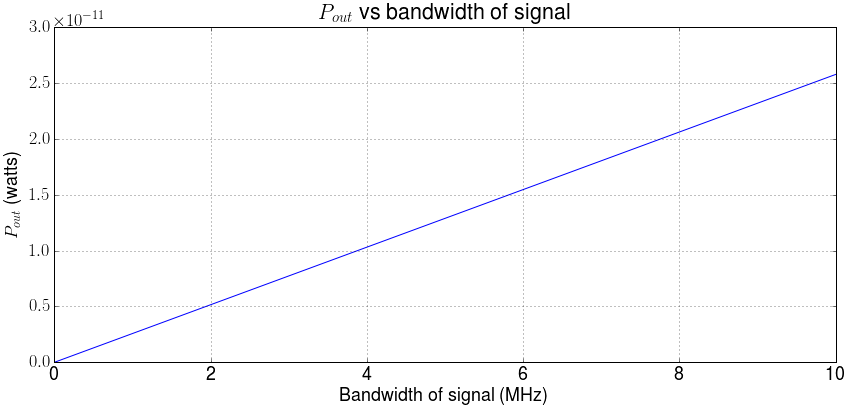

In [12]:
pout = k*bfilt*G*(TA+Tsys)
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
fig = plt.figure(figsize=(14,6), dpi=300)
plot(bfilt,pout)
xlabel('Bandwidth of signal (MHz)')
ylabel('$P_{out}$ (watts)')
title('$P_{out}$ vs bandwidth of signal')
#axis([0, 10.5e6, 0, 10])
def fmt_mhz(val,pos=None):
    return '%g' % (val / 1e6)
gca().xaxis.set_major_formatter(FuncFormatter(fmt_mhz))
#plt.ticklabel_format(style='sci', axis='x', useOffset=True, scilimits=(-5,5))
grid(True)
fig.savefig("poutvsbw_plot.pdf", dpi=300)
fig.savefig("poutvsbw_plot.png", dpi=300)

[  9.99900000e+06   9.99800010e+06   9.99700020e+06 ...,   2.99979998e+03
   1.99989999e+03   1.00000000e+03]


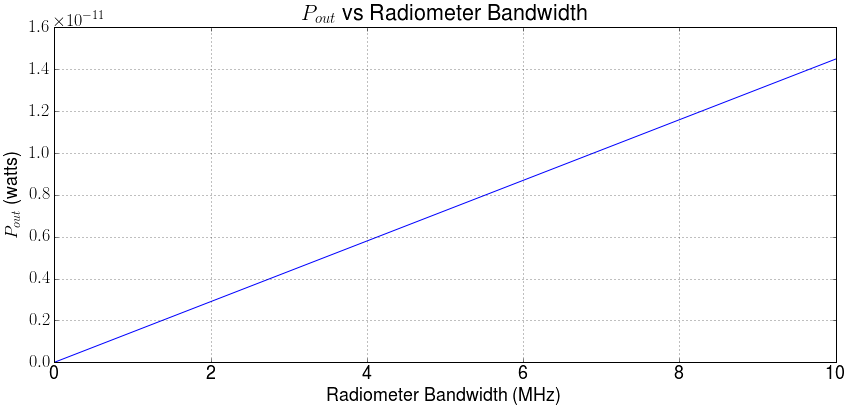

In [13]:
radbw = numpy.linspace(9.999e6,1e3,10e3)
pout = k*radbw*G*Tsys
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
fig = plt.figure(figsize=(14,6), dpi=300)
plot(radbw,pout)
xlabel('Radiometer Bandwidth (MHz)')
ylabel('$P_{out}$ (watts)')
title('$P_{out}$ vs Radiometer Bandwidth')
#axis([0, 10.5e6, 0, 10])
def fmt_mhz(val,pos=None):
    return '%g' % (val / 1e6)
gca().xaxis.set_major_formatter(FuncFormatter(fmt_mhz))
#plt.ticklabel_format(style='sci', axis='x', useOffset=True, scilimits=(-5,5))
grid(True)
fig.savefig("poutvsradbw_plot.pdf", dpi=300)
fig.savefig("poutvsradbw_plot.png", dpi=300)
print radbw

In [14]:
rQ_values = [.25,.20,.225,(.225-.05),.20,.15]
temp_values = [273.15,77]
a = numpy.array([[rQ_values[0],1.0],[rQ_values[1],1.0]],numpy.float32)
b = numpy.array([temp_values[0],temp_values[1]])
c = numpy.array([[rQ_values[2],1.0],[rQ_values[3],1.0]],numpy.float32)
d = numpy.array([[rQ_values[4],1.0],[rQ_values[5],1.0]],numpy.float32)

In [15]:
t = numpy.linalg.solve(a,b)
print t
u = numpy.linalg.solve(c,b)
print u
v = numpy.linalg.solve(d,b)
print v

[ 3923.00023383  -707.60005846]
[ 3923.00023383  -609.52502923]
[ 3923.00023383  -511.45005846]


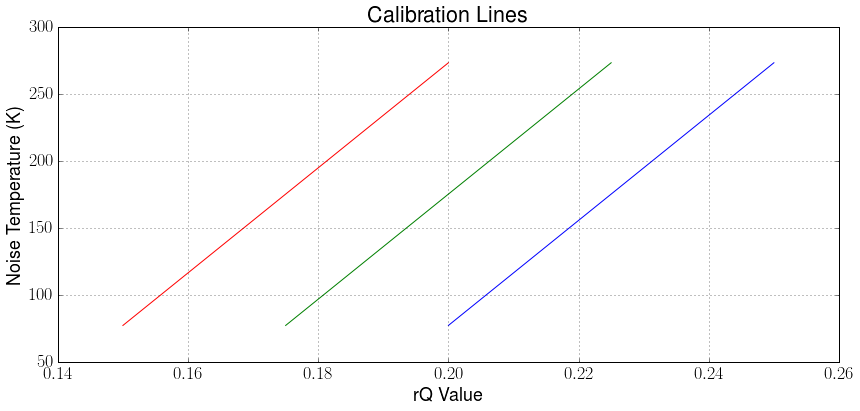

In [16]:
tempval = numpy.linspace(temp_values[1],temp_values[0],1e3)
rqrange1 = numpy.linspace(rQ_values[1],rQ_values[0],1e3)
rqrange2 = numpy.linspace(rQ_values[3],rQ_values[2],1e3)
rqrange3 = numpy.linspace(rQ_values[5],rQ_values[4],1e3)
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
fig = plt.figure(figsize=(14,6), dpi=300)
s = t[0]*rqrange1+t[1]
q = u[0]*rqrange2+u[1]
r = v[0]*rqrange3+v[1]
plot(rqrange1,s)
plot(rqrange2,q)
plot(rqrange3,r)
xlabel('rQ Value')
ylabel('Noise Temperature (K)')
title('Calibration Lines')
#axis([0, 10.5e6, 0, 10])
#def fmt_mhz(val,pos=None):
 #   return '%g' % (val / 1e6)
#gca().xaxis.set_major_formatter(FuncFormatter(fmt_mhz))
#plt.ticklabel_format(style='sci', axis='x', useOffset=True, scilimits=(-5,5))
grid(True)
fig.savefig("calibration_plot.pdf", dpi=300)
fig.savefig("calibration_plot.png", dpi=300)